In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from scipy.stats import ttest_ind
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import ttest_rel

In [143]:
stud=pd.read_csv('/content/StudentsPerformance.csv')
stud.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [144]:
stud.shape #to show the column and row structure

(1000, 8)

In [145]:
stud.info() #to show the column name, missing values and data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [146]:
stud.describe() #to show the statistical summary of the dataset

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [147]:
stud.columns #to show the column names

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [148]:
Gender_count = stud['gender'].value_counts()
print("Male count : ", Gender_count['male'])
print("Female count : ", Gender_count['female'])

Male count :  482
Female count :  518


In [149]:
members = stud['test preparation course'].value_counts()
print (members)

test preparation course
none         642
completed    358
Name: count, dtype: int64


# 1: How many males and females participated in the test

In [150]:
male_attendees = stud[(stud['gender'] == 'male') & (stud['test preparation course'] == 'completed')]
female_attendees =stud[(stud['gender'] == 'female') & (stud['test preparation course'] == 'completed')]
print ("Male attendees = ", male_attendees.shape[0])
print ("Female attendees = ", female_attendees.shape[0])

Male attendees =  174
Female attendees =  184


# 2:What do you think about the students parental level of education?

In [151]:
parental_education = stud['parental level of education'].value_counts()
print (parental_education)

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


<Axes: xlabel='score', ylabel='parental level of education'>

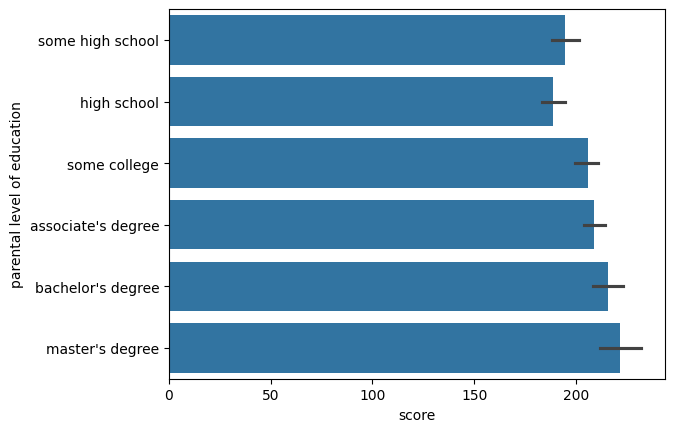

In [152]:
stud['score']=stud['math score']+stud['reading score']+stud['writing score']
sns.barplot(x='score',y='parental level of education',data=stud)

## From the above diagram we can find that students with  higher parental level of education secure more score


3: Who scores the most on average for math,reading & writing based on

   a: Genter

In [153]:
math = stud.groupby('gender')['math score'].mean()
reading = stud.groupby('gender')['reading score'].mean()
writing = stud.groupby('gender')['writing score'].mean()
print ("Score variation for Maths against ", math)
print ('\nScore variation for Reading against', reading,'\n')
print ("Score variation for Writing against", writing,'\n')
print('\nMale students scores the most on average for math \nFemale students scores the most on average for reading and writing')

Score variation for Maths against  gender
female    63.376448
male      68.821577
Name: math score, dtype: float64

Score variation for Reading against gender
female    72.590734
male      65.545643
Name: reading score, dtype: float64 

Score variation for Writing against gender
female    72.467181
male      63.446058
Name: writing score, dtype: float64 


Male students scores the most on average for math 
Female students scores the most on average for reading and writing


b:Test Preparation Course

In [154]:
T_math = stud.groupby('test preparation course')['math score'].mean()
T_reading = stud.groupby('test preparation course')['reading score'].mean()
T_writing = stud.groupby('test preparation course')['writing score'].mean()
print ("Score variation for Maths against ",T_math)
print ('\nScore variation for Reading against', T_reading,'\n')
print ("Score variation for Writing against", T_writing,'\n')
print('\nStudents who completed the test preparation course secure better scores than those who did not')

Score variation for Maths against  test preparation course
completed    69.96648
none         63.78972
Name: math score, dtype: float64

Score variation for Reading against test preparation course
completed    74.175978
none         66.417445
Name: reading score, dtype: float64 

Score variation for Writing against test preparation course
completed    74.684358
none         64.457944
Name: writing score, dtype: float64 


Students who completed the test preparation course secure better scores than those who did not


# 4: What do think about the scoring variation for maths,reading and writing based on
a:Genter

In [163]:
math = stud.groupby('gender')['math score'].std()
reading = stud.groupby('gender')['reading score'].std()
writing = stud.groupby('gender')['writing score'].std()
print ("Score variation for Maths against ", math)
print ('\n Score variation for Reading against', reading,'\n')
print ("Score variation for Writing against", writing,'\n')
print('\nThe female students are showing more variation than the male students in Maths score',
 '\nand for reading and writing there is not much variation ')

Score variation for Maths against  gender
female    16.029928
male      14.556411
Name: math score, dtype: float64

 Score variation for Reading against gender
female    14.411018
male      14.149594
Name: reading score, dtype: float64 

Score variation for Writing against gender
female    14.844842
male      14.227225
Name: writing score, dtype: float64 


The female students are showing more variation than the male students in Maths score 
and for reading and writing there is not much variation 


b:Test Preparation Course

In [156]:
T_math = stud.groupby('test preparation course')['math score'].std()
T_reading = stud.groupby('test preparation course')['reading score'].std()
T_writing = stud.groupby('test preparation course')['writing score'].std()
print ("Score variation for Maths against ",T_math)
print ('\nScore variation for Reading against', T_reading,'\n')
print ("Score variation for Writing against", T_writing,'\n')
print('\nThere are significant variance showing in the score of students who are not done test preparatory cource')

Score variation for Maths against  test preparation course
completed    14.521847
none         15.705689
Name: math score, dtype: float64

Score variation for Reading against test preparation course
completed    13.537572
none         14.608896
Name: reading score, dtype: float64 

Score variation for Writing against test preparation course
completed    13.236412
none         15.041667
Name: writing score, dtype: float64 


There are significant variance showing in the score of students who are not done test preparatory cource


5:Bonus points for top 25% students based on Maths Score

In [189]:
stud1=stud.sort_values(by='math score',ascending=False)
stud2=stud1.head(25)
stud2['Bonus Points']=stud1['math score'].apply(lambda x:10)
stud2


<ipython-input-189-bd5da35e50d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud2['Bonus Points']=stud1['math score'].apply(lambda x:10)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score,Bonus Points
999,male,group E,bachelor's degree,standard,completed,100,100,100,300,10
996,male,group A,some college,standard,completed,100,96,86,282,10
515,female,group E,some college,standard,none,100,92,97,289,10
517,female,group E,associate's degree,standard,none,100,100,100,300,10
516,female,group E,bachelor's degree,standard,none,100,100,100,300,10
997,male,group D,some college,standard,completed,100,97,99,296,10
998,male,group E,associate's degree,free/reduced,completed,100,100,93,293,10
995,male,group E,some college,standard,completed,99,87,81,267,10
513,female,group E,bachelor's degree,standard,completed,99,100,100,299,10
514,female,group E,high school,standard,none,99,93,90,282,10


# **Case Study on Testing of Hypothesis**

a. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

In [158]:
sales=pd.read_csv('/content/Sales_add.csv')
sales.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [159]:
sales.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [160]:
sales_before = sales['Sales_before_digital_add(in $)']
sales_after = sales['Sales_After_digital_add(in $)']
t_statistic , p_value = ttest_rel(sales_before,sales_after)
print('t_statistic = ',t_statistic)
print('p_value = ',p_value)
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant increase in sales after implementing digital marketing.")
else:
    print("Fail to reject the null hypothesis. There is no significant increase in sales after implementing digital marketing.")

t_statistic =  -12.09070525287017
p_value =  6.336667004575778e-11
Reject the null hypothesis. There is a significant increase in sales after implementing digital marketing.


# b. The company needs to check whether there is any dependency between the features “Region” and “Manager”.

In [161]:
table_cont = pd.crosstab(sales['Region'],sales['Manager'])
print(table_cont)
chi2_stat , p_value, dof , expected = chi2_contingency(table_cont)
print("\nChi-square test results \n------------------------\n")
print("Chi-square statistic =", chi2_stat)
print("p-value : ", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis. There is a dependency between Region and Manager.")
else:
    print("Fail to reject the null hypothesis. There is no dependency between Region and Manager.")

Manager     Manager - A  Manager - B  Manager - C
Region                                           
Region - A            4            3            3
Region - B            4            1            2
Region - C            1            3            1

Chi-square test results 
------------------------

Chi-square statistic = 3.050566893424036
p-value :  0.5493991051158094
Fail to reject the null hypothesis. There is no dependency between Region and Manager.
